# Face detection with ageitgey/face_recognition

https://github.com/ageitgey/face_recognition

In [ ]:
! pip3 install face_recognition

In [ ]:
import face_recognition
from PIL import Image

In [ ]:
image = face_recognition.load_image_file("/content/1644082358787.jpg")
face_locations = face_recognition.face_locations(image)

In [ ]:
top, right, bottom, left = face_locations[0]
face_image = image[top:bottom, left:right]
pil_image = Image.fromarray(face_image)

In [ ]:
pil_image.save('face.jpg')

# Feature extraction with VGGFace2-ResNet50

https://github.com/WeidiXie/Keras-VGGFace2-ResNet50

In [1]:
# ! unzip /content/drive/MyDrive/vggface2_Keras.zip

In [2]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

In [3]:
img_path = '/content/face.jpg'
img = load_img(img_path, target_size=(224, 224))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

In [4]:
print(img_tensor.shape)

(1, 224, 224, 3)


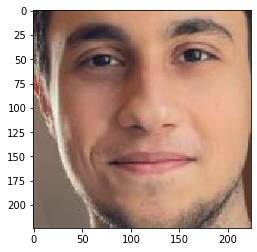

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [6]:
from keras import models

In [7]:
model = load_model('/content/vggface2_Keras/model/resnet50_softmax_dim512/weights.h5') 

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 base_input (InputLayer)        [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['base_input[0][0]']             
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                           

In [9]:
len(model.layers)

177

In [10]:
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
activations = activation_model.predict(img_tensor)

In [17]:
len(activations)

6

In [20]:
layer_activation = activations[]

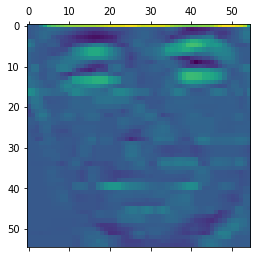

In [21]:
plt.matshow(layer_activation[0, :, :, 2], cmap='viridis')

In [ ]:
# layer_names = []
# for layer in model.layers[-8:-3]:
#     layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
# images_per_row = 16

# for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
#     n_features = layer_activation.shape[-1] # Number of features in the feature map
#     size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
#     n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
#     display_grid = np.zeros((size * n_cols, images_per_row * size))
#     for col in range(n_cols): # Tiles each filter into a big horizontal grid
#         for row in range(images_per_row):
#             channel_image = layer_activation[0,
#                                              :, :,
#                                              col * images_per_row + row]
#             channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
#             channel_image /= channel_image.std()
#             channel_image *= 64
#             channel_image += 128
#             channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#             display_grid[col * size : (col + 1) * size, # Displays the grid
#                          row * size : (row + 1) * size] = channel_image
#     scale = 1. / size
#     plt.figure(figsize=(scale * display_grid.shape[1],
#                         scale * display_grid.shape[0]))
#     plt.title(layer_name)
#     plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')